In [4]:
import json
import tweepy
import pymongo
from pymongo import MongoClient
import re 
import pprint
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["thaielection_db"]
mycol = mydb["thaielection_col"]

In [5]:
query = {}
projection = { "_id": 0, "text" : 1  , "text_clean" : 1 }
mycol.find_one(query,projection)

{'text': 'RT @TheEIU: Thailand has introduced new legislation covering cyber-security, data protection and digital identity. However, the nature and…',
 'text_clean': 'rt theeiu thailand has introduced new legislation covering cyber security data protection and digital identity however the nature and '}

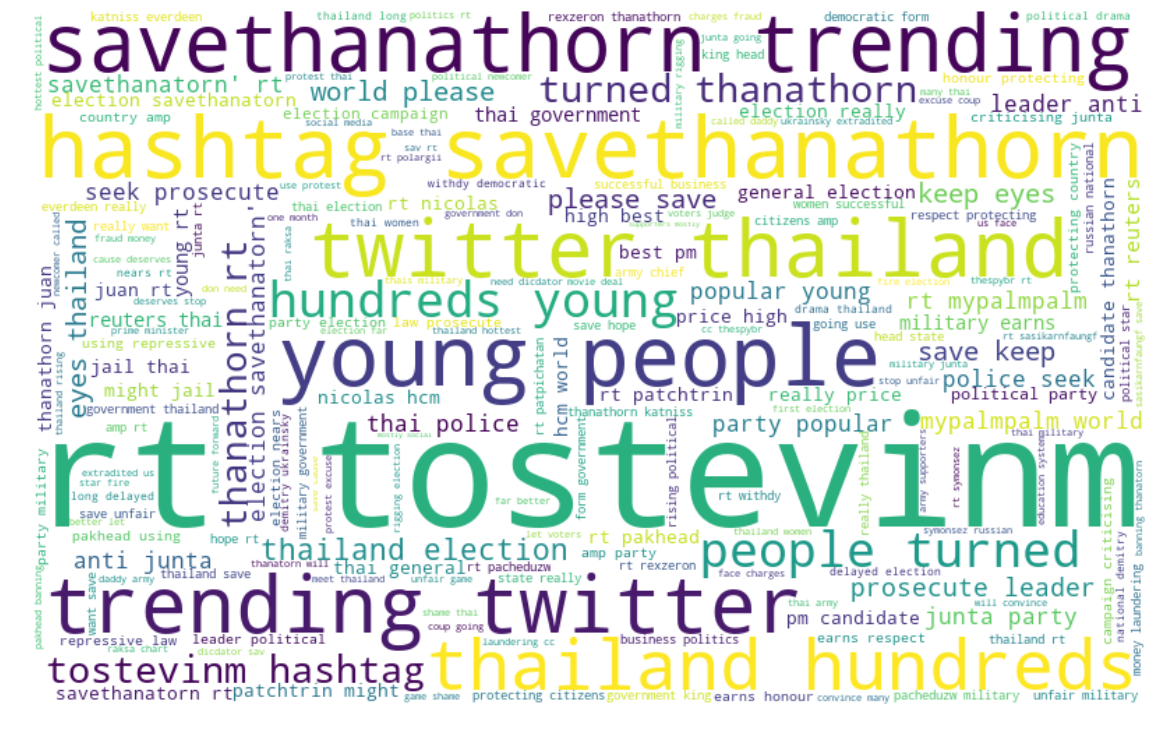

In [6]:
projection = { "_id": 0, "text_clean" : 1 }
y = mycol.find(query,projection)

text = ""

for x in y:
    x = str(x)
    x = re.sub("'text_clean':", " ", x)
    text = text + x
    
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(text)

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

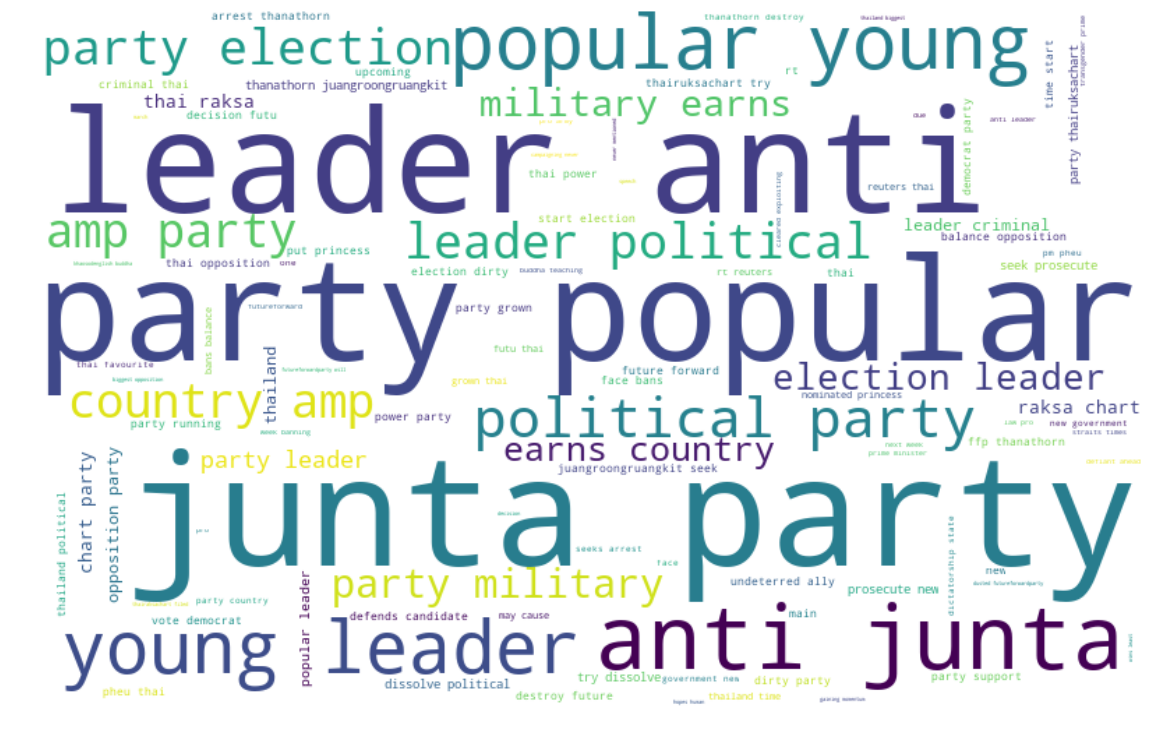

In [7]:
query = {"text_clean": {"$regex": "party"} }
projection = {"_id": 0,"text_clean": 1}

y = mycol.find(query,projection)
text = ""
for x in y:
    x = str(x)
    x = re.sub("'text_clean':", " ", x)
    x = re.findall("[a-z]*\s*[a-z]*\s*[a-z]*\s*[a-z]*\s*party\s*[a-z]*\s*[a-z]*[a-z]*\s*[a-z]*\s*", x)
    text = text + str(x)
#     print(x)
    
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(text)

plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [8]:
party = ["(junta party)|(juntaparty)", #1
             "(thai raksa chart)|(thairaksachart)|(thairaksachartparty)", #2
            "(future forward)|(futureforward)|(futureforwardparty)", #3
             "(pheu Thai)|(pheuthai)|(pheuthaiparty)", #4
            "(\s+democrat\s+)|(\s+democratparty\s+)"] #5

party_word = []

for p in party :
    
    query = {"text_clean": {"$regex": p} }
    projection = {"_id": 0,"text_clean": 1}
    
    y = mycol.find(query,projection)
    
    text = ""
    
    for x in y:
        x = str(x)
        x = re.sub("'text_clean':", " ", x)
        text = text + str(x)
    
    text = re.sub("\W", " ", text)
    text = re.sub("[^a-zA-Z]", " ", text)
    text = re.sub("\s\w{1,2}\s", " ", text)
    text = re.sub("\s+", " ", text)
#     pprint.pprint(text)
    party_word.append(text)

In [9]:
unwanted_chars = ".,-_{}''[]"
stop_word = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own","same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
stop_word.append("s")
stop_word.append("rt")

party_word_list = []

for data in party_word :
    wordfreq = {}
    words = data.split()

    for raw_word in words :
        w = raw_word.strip(unwanted_chars)
        if w not in stop_word :
            if w not in wordfreq :
                wordfreq[w] = 0 
            wordfreq[w] += 1
    
    party_word_list.append(wordfreq)

In [10]:
all_node = []
for wordfreq in party_word_list : 
    mydict = wordfreq
    mynode = []
    j = 0

    for i in sorted(mydict, key=mydict.get, reverse = True):
#         print (i,mydict[i])
        j = j+1
        if j <= 25 : 
            mynode.append(i)
#         print (i,mydict[i])
#     print(mynode)

    all_node.append(mynode)

In [12]:
pprint.pprint(all_node[0])

['junta',
 'party',
 'thai',
 'police',
 'seek',
 'prosecute',
 'leader',
 'anti',
 'popular',
 'young',
 'reuters',
 'savethanatorn',
 'reported',
 'please',
 'yingrekpuck',
 'amp',
 'article',
 'chametawarin',
 'sirinthrap',
 'pro',
 'savethanathon',
 'election',
 'campaign',
 'season',
 'hasn']


In [ ]:
pprint.pprint(all_node[4])

In [335]:
JuntaParty = all_node[0]
ThaiRaksaChart = all_node[1]
FutureForward = all_node[2]
PheuThai  = all_node[3]
Democrat = all_node[4]

In [336]:
import matplotlib.pyplot as plt
import networkx as nx
G.clear()
G = nx.Graph()

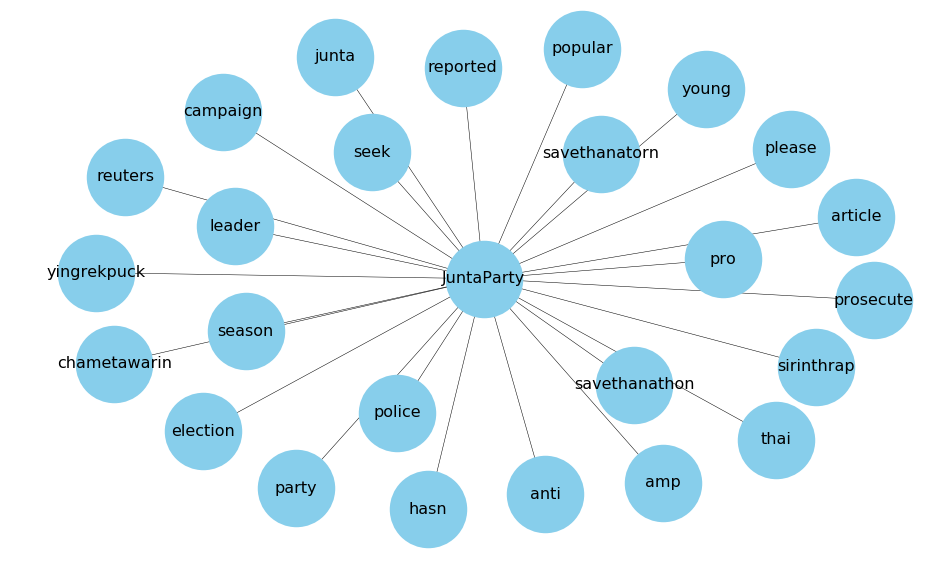

In [343]:
G.clear()
G = nx.Graph()
centerNode = JuntaParty
namecenterNode = "JuntaParty"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
    

# nx.draw(G,with_labels=True,  node_color="skyblue",node_size=1000, font_size=8,width=0.2,
#              linewidths=0.01)

plt.figure(figsize=(16,10))

nx.draw_networkx(G, with_labels=True,  node_color="skyblue",node_size=6000, font_size=16,width=0.5,
             linewidths=0.01)
plt.axis('off')
plt.savefig('JuntaParty.png')
# plt.axis('off')
# plt.show()


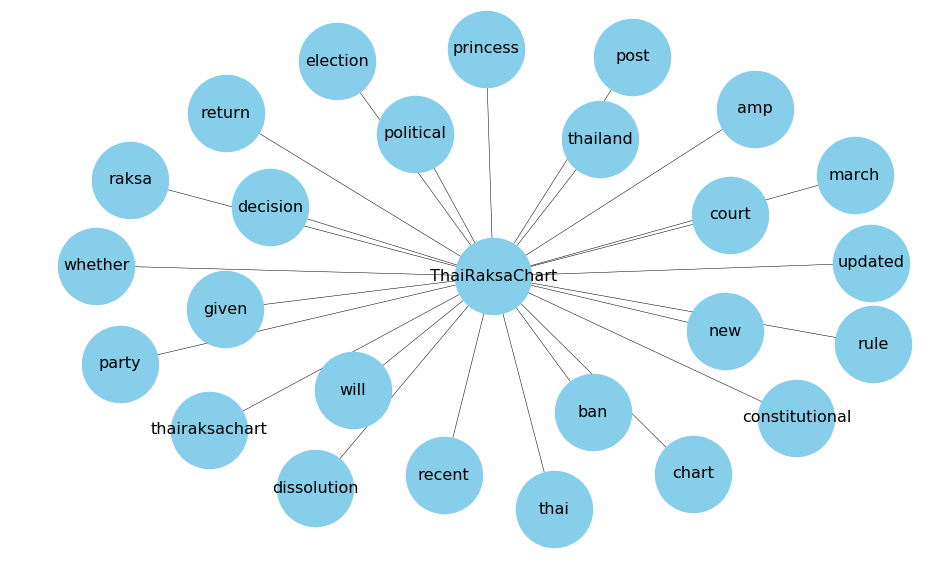

In [344]:
G.clear()
G = nx.Graph()
centerNode = ThaiRaksaChart
namecenterNode = "ThaiRaksaChart"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
    

plt.figure(figsize=(16,10))

nx.draw_networkx(G, with_labels=True,  node_color="skyblue",node_size=6000, font_size=16,width=0.5,
             linewidths=0.01)
plt.axis('off')
plt.savefig('ThaiRaksaChart.png')

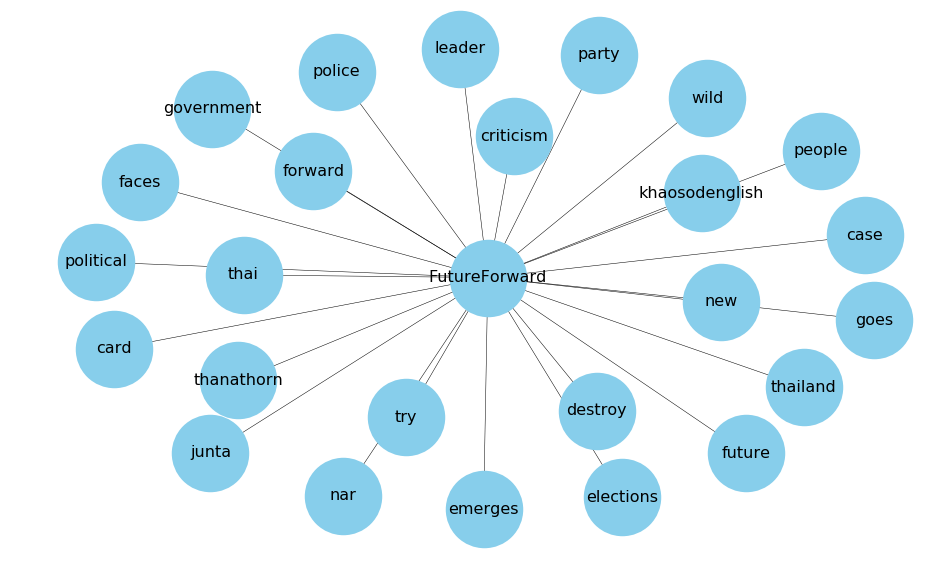

In [342]:
G.clear()
G = nx.Graph()
centerNode = FutureForward
namecenterNode = "FutureForward"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
    

plt.figure(figsize=(16,10))

nx.draw_networkx(G, with_labels=True,  node_color="skyblue",node_size=6000, font_size=16,width=0.5,
             linewidths=0.01)
plt.axis('off')
plt.savefig('FutureForward.png')

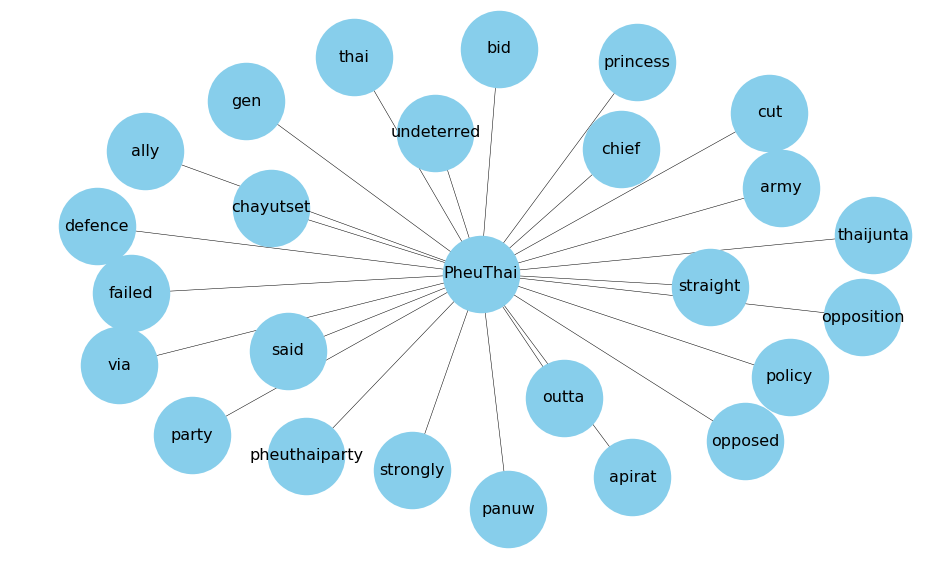

In [345]:
G.clear()
G = nx.Graph()
centerNode = PheuThai
namecenterNode = "PheuThai"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
    

plt.figure(figsize=(16,10))

nx.draw_networkx(G, with_labels=True,  node_color="skyblue",node_size=6000, font_size=16,width=0.5,
             linewidths=0.01)
plt.axis('off')
plt.savefig('PheuThai.png')

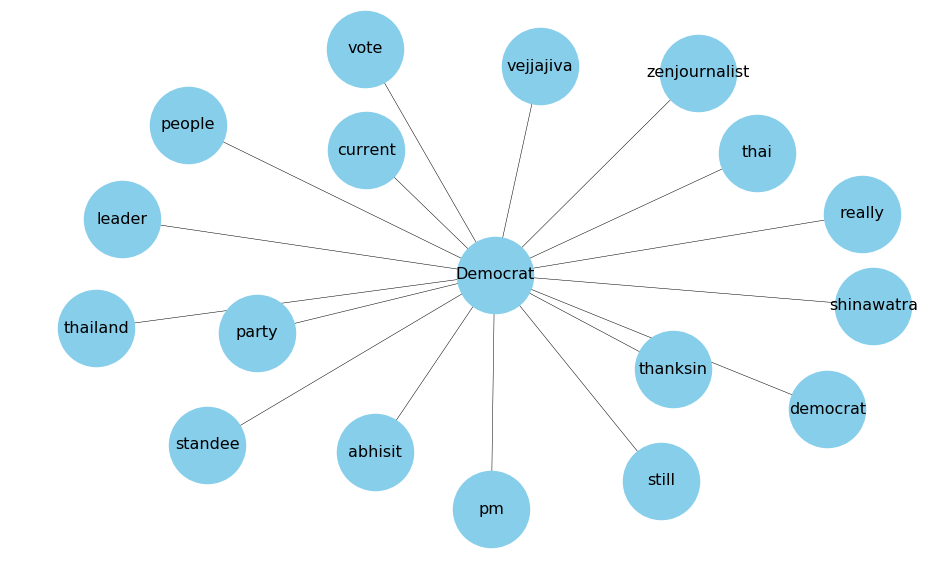

In [346]:
G.clear()
G = nx.Graph()
centerNode = Democrat
namecenterNode = "Democrat"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
    

plt.figure(figsize=(16,10))

nx.draw_networkx(G, with_labels=True,  node_color="skyblue",node_size=6000, font_size=16,width=0.5,
             linewidths=0.01)
plt.axis('off')
plt.savefig('Democrat.png')

In [260]:
all_node = []
for wordfreq in party_word_list : 
    mydict = wordfreq
    mynode = []
    j = 0

    for i in sorted(mydict, key=mydict.get, reverse = True):
#         print (i,mydict[i])
        j = j+1
        if j <= 20 : 
            mynode.append(i)
#         print (i,mydict[i])
#     print(mynode)

    all_node.append(mynode)
    
JuntaParty = all_node[0]
ThaiRaksaChart = all_node[1]
FutureForward = all_node[2]
PheuThai  = all_node[3]
Democrat = all_node[4]

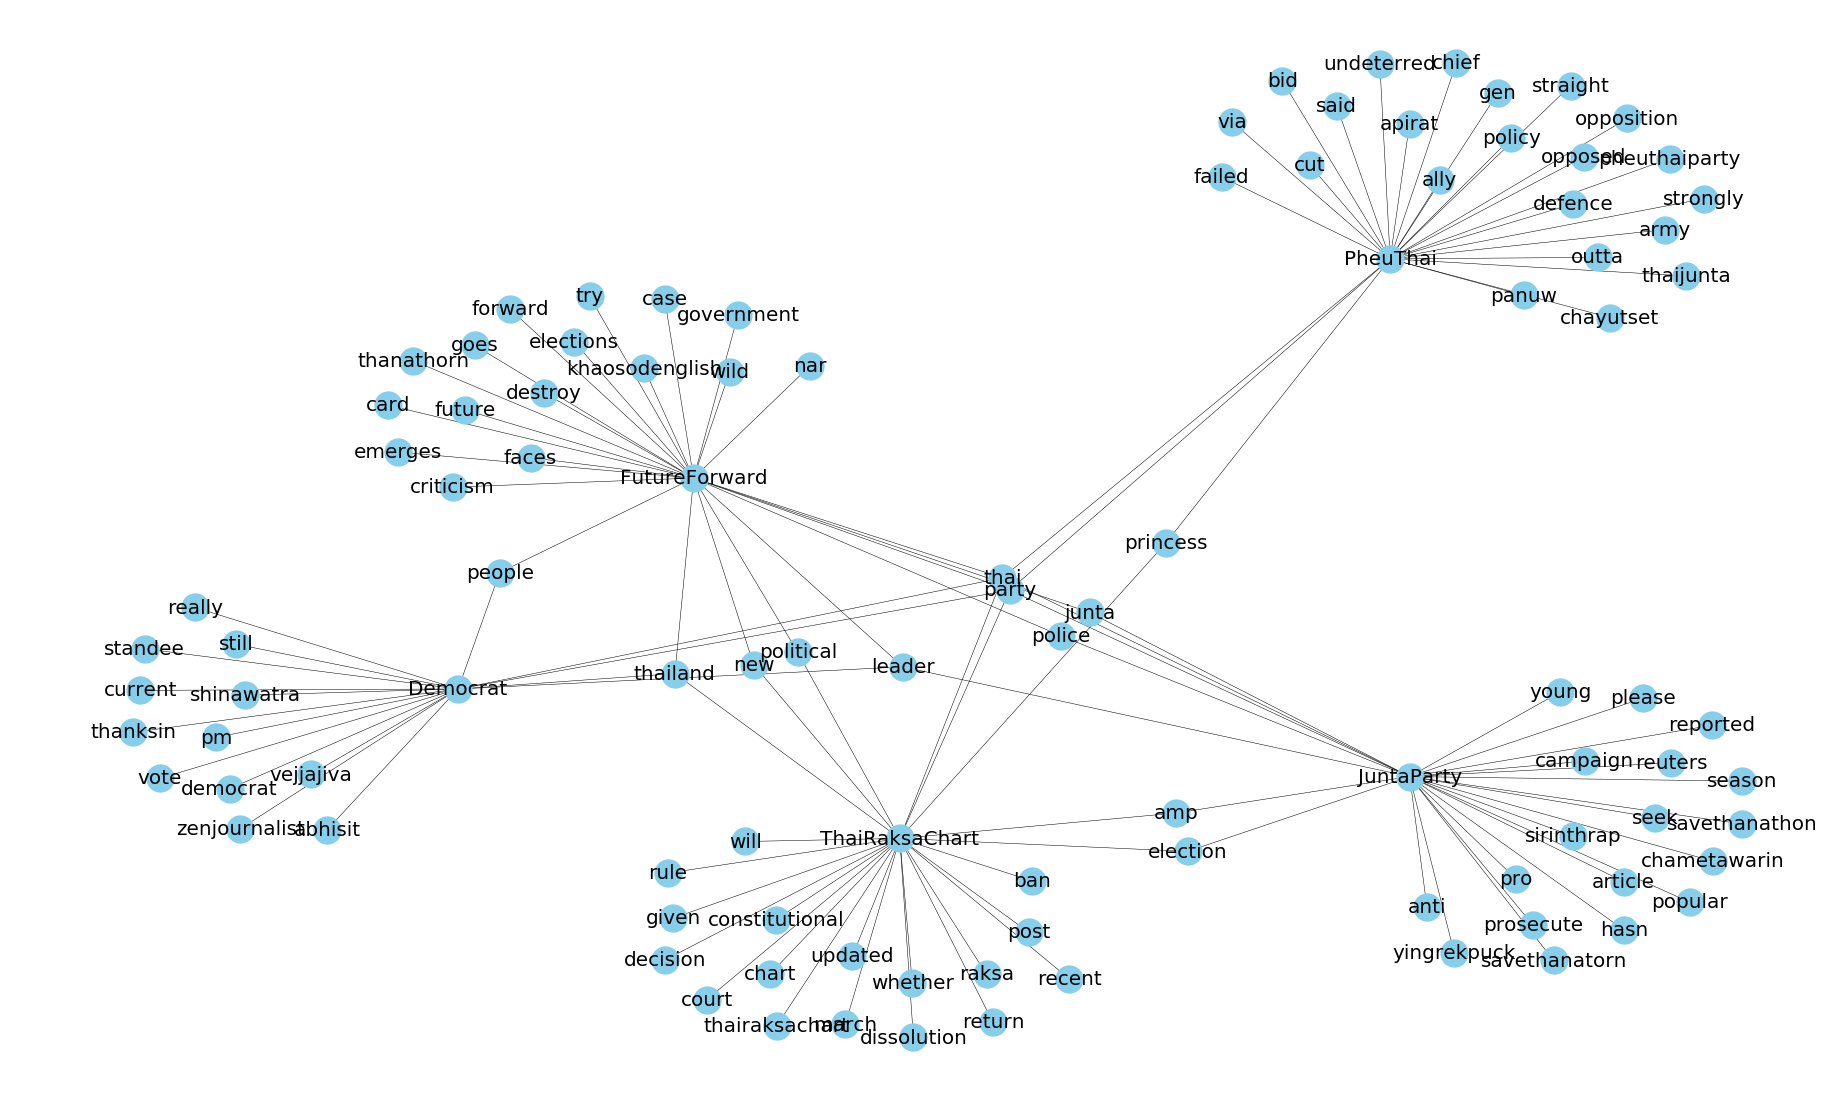

In [400]:
# JuntaParty = all_node[0]
# ThaiRaksaChart = all_node[1]
# FutureForward = all_node[2]
# PheuThai  = all_node[3]
# Democrat = all_node[4]
G.clear()
G = nx.Graph()

#################


centerNode = JuntaParty
namecenterNode = "JuntaParty"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
#################


centerNode = ThaiRaksaChart
namecenterNode = "ThaiRaksaChart"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
################# 


centerNode = FutureForward
namecenterNode = "FutureForward"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
#################


centerNode = PheuThai
namecenterNode = "PheuThai"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
#################


centerNode = Democrat
namecenterNode = "Democrat"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
################# 


plt.figure(figsize=(32,20))
nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
                 node_size=800, font_size=20 ,width=0.5,
             linewidths=0.01)
plt.axis('off')
plt.savefig('AllParty.png')


In [399]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = JuntaParty
# namecenterNode = "JuntaParty"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################


# centerNode = ThaiRaksaChart
# namecenterNode = "ThaiRaksaChart"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    



# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')


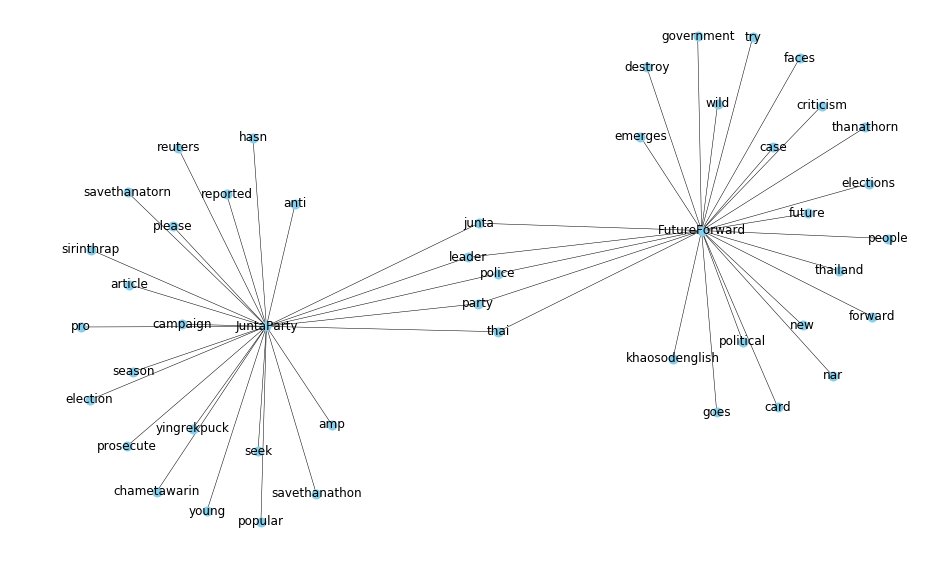

In [420]:
G.clear()
G = nx.Graph()

#################


centerNode = JuntaParty
namecenterNode = "JuntaParty"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
#################



centerNode = FutureForward
namecenterNode = "FutureForward"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    


plt.figure(figsize=(16,10))
nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
                 node_size=100, font_size=12 ,width=0.5,
             linewidths=0.01)
plt.axis('off')

# plt.savefig('JuntaParty_FutureForward.png')

In [ ]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = JuntaParty
# namecenterNode = "JuntaParty"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################



# centerNode = PheuThai
# namecenterNode = "PheuThai"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    


# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')


In [403]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = JuntaParty
# namecenterNode = "JuntaParty"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################



# centerNode = Democrat
# namecenterNode = "Democrat"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    


# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')


In [407]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = ThaiRaksaChart
# namecenterNode = "ThaiRaksaChart"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################



# centerNode = FutureForward
# namecenterNode = "FutureForward"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    


# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')


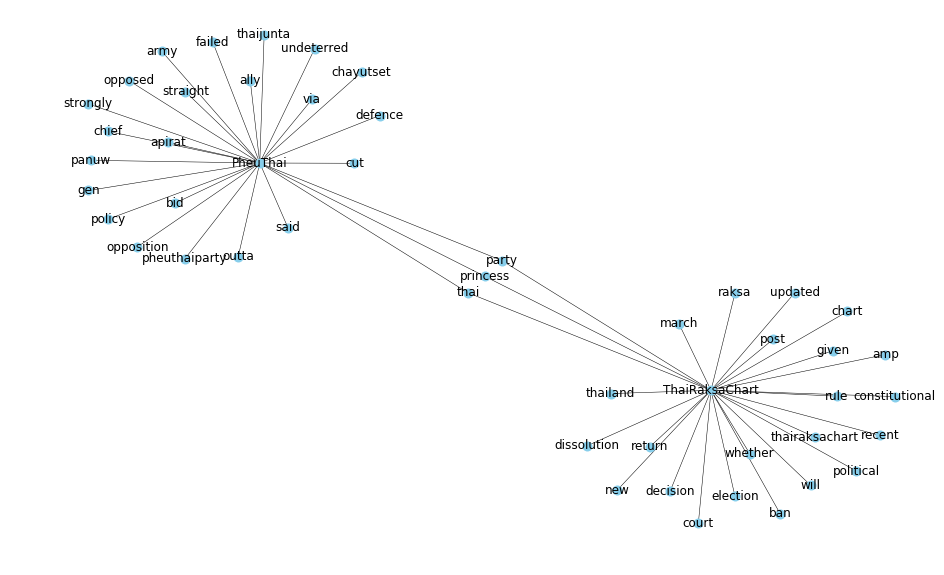

In [424]:
G.clear()
G = nx.Graph()

#################


centerNode = ThaiRaksaChart
namecenterNode = "ThaiRaksaChart"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    
#################



centerNode = PheuThai
namecenterNode = "PheuThai"
G.add_node(namecenterNode)
G.add_nodes_from(centerNode)

for i in centerNode :
    G.add_edges_from([(namecenterNode, i)])
    


plt.figure(figsize=(16,10))
nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
                 node_size=100, font_size=12 ,width=0.5,
             linewidths=0.01)
plt.axis('off')
# plt.savefig('ThaiRaksaChart_PheuThai.png')

End

In [410]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = ThaiRaksaChart
# namecenterNode = "ThaiRaksaChart"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################



# centerNode = Democrat
# namecenterNode = "Democrat"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    


# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')

In [412]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = FutureForward
# namecenterNode = "FutureForward"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################



# centerNode = PheuThai
# namecenterNode = "PheuThai"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    


# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')

In [414]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = FutureForward
# namecenterNode = "FutureForward"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################



# centerNode = Democrat
# namecenterNode = "Democrat"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    


# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')


In [416]:
# G.clear()
# G = nx.Graph()

# #################


# centerNode = PheuThai
# namecenterNode = "PheuThai"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    
# #################



# centerNode = Democrat
# namecenterNode = "Democrat"
# G.add_node(namecenterNode)
# G.add_nodes_from(centerNode)

# for i in centerNode :
#     G.add_edges_from([(namecenterNode, i)])
    


# plt.figure(figsize=(16,10))
# nx.draw_networkx(G, with_labels=True,  node_color="skyblue",
#                  node_size=100, font_size=16 ,width=0.5,
#              linewidths=0.01)
# plt.axis('off')

In [3]:

stop_word = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own","same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
for i in stop_word :
    print(i)

a
about
above
after
again
against
all
am
an
and
any
are
as
at
be
because
been
before
being
below
between
both
but
by
could
did
do
does
doing
down
during
each
few
for
from
further
had
has
have
having
he
he'd
he'll
he's
her
here
here's
hers
herself
him
himself
his
how
how's
i
i'd
i'll
i'm
i've
if
in
into
is
it
it's
its
itself
let's
me
more
most
my
myself
nor
of
on
once
only
or
other
ought
our
ours
ourselves
out
over
own
same
she
she'd
she'll
she's
should
so
some
such
than
that
that's
the
their
theirs
them
themselves
then
there
there's
these
they
they'd
they'll
they're
they've
this
those
through
to
too
under
until
up
very
was
we
we'd
we'll
we're
we've
were
what
what's
when
when's
where
where's
which
while
who
who's
whom
why
why's
with
would
you
you'd
you'll
you're
you've
your
yours
yourself
yourselves
